<a href="https://colab.research.google.com/github/paokungz/IS_Project/blob/main/dosmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### การจัดการค่าที่หายไปในข้อมูลการโจมตี DDoS ###
### ข้อมูลที่เติมค่าหายไปและแปลงข้อมูลแล้ว ###
   Source Port  Dest Port  Packet Length  Packets/Time  target
0          0.0        0.0           60.0          92.8       1
1          0.0        0.0           42.0          92.9       0
2          0.0        0.0           60.0         362.8       1
3          0.0        0.0           42.0         362.8       0
4          0.0        0.0           60.0         364.3       1
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21315/21315 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - accuracy: 0.9822 - loss: 8.5670 - val_accuracy: 0.9966 - val_loss: 0.5592
Epoch 2/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9960 - loss: 0.1794 - val_accuracy: 0.9818 - val_loss: 0.4247
Epoch 3/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - accuracy: 0.9955 - loss: 0.0321 - val_accuracy: 0.9972 - val_loss: 0.0335
Epoch 4/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.9976 - loss: 0.0204 - val_accuracy: 0.9973 - val_loss: 0.0237
Epoch 5/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 55s 3ms/step - accuracy: 0.9977 - loss: 0.0104 - val_accuracy: 0.9968 - val_loss: 0.0203
Epoch 6/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.9977 - loss: 0.0088 - val_accuracy: 0.9971 - val_loss: 0.0136
Epoch 7/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 79s 2ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 0.9966 - val_loss: 0.0137
Epoch 8/10
21315/21315 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9963 - lo

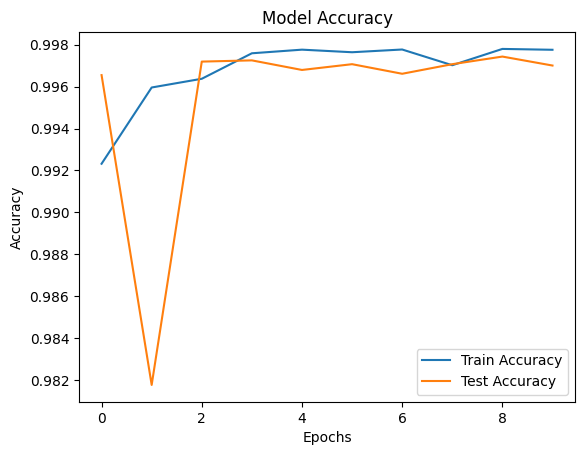

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# โหลดข้อมูล DDoS
file_path =(r'/content/sample_data/DDoS_Dataset_with_Missing_Values.csv')  # ใส่พาธไฟล์ของคุณที่นี่
ddos_data = pd.read_csv(file_path)

# การจัดการค่าที่หายไปในข้อมูลการโจมตี DDoS
print("### การจัดการค่าที่หายไปในข้อมูลการโจมตี DDoS ###")
columns_to_consider = ddos_data.drop(columns=['Highest Layer', 'Transport Layer', 'Source IP', 'Dest IP'])

# เติมค่าที่หายไปในข้อมูลเชิงตัวเลข
imputer = SimpleImputer(strategy='mean')  # เติมค่าที่หายไปด้วยค่าเฉลี่ย
columns_to_consider[['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time']] = imputer.fit_transform(
    columns_to_consider[['Source Port', 'Dest Port', 'Packet Length', 'Packets/Time']]
)

# แปลงข้อมูลประเภทข้อความใน target เป็นตัวเลข
label_encoder = LabelEncoder()
columns_to_consider['target'] = label_encoder.fit_transform(columns_to_consider['target'])

# แสดงผลข้อมูลที่เติมค่าหายไปแล้ว
print("### ข้อมูลที่เติมค่าหายไปและแปลงข้อมูลแล้ว ###")
print(columns_to_consider.head())

# แยกข้อมูลเป็น X (features) และ y (target)
X = columns_to_consider.drop(columns=['target'])
y = columns_to_consider['target']

# แบ่งข้อมูลเป็นชุดฝึก (Training Set) และชุดทดสอบ (Test Set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้าง Neural Network Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # ชั้นแรก 64 นิวรอน
model.add(Dense(32, activation='relu'))  # ชั้นที่สอง 32 นิวรอน
model.add(Dense(1, activation='sigmoid'))  # เลเยอร์สุดท้ายสำหรับ Classification (2 คลาส)

# คอมไพล์โมเดล
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ฝึกโมเดล
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# แสดงผลลัพธ์การฝึก
train_accuracy = history.history['accuracy'][-1]
test_accuracy = history.history['val_accuracy'][-1]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# แสดงกราฟการฝึก
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# บันทึกโมเดลในไฟล์ .h5
model.save('model.h5')

# ดาวน์โหลดไฟล์โมเดลจาก Colab
from google.colab import files
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>